<img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/banner-spectral.png" width="1000" align="middle"/>

# <font color='#ECA702'>**Hands-on Sesión 4: Breve introducción a las Imagenes Espectrales 🔬🌈📸🌌**</font>




# <font color='#4C5FDA'>**Descripción**</font>



Una imagen espectral se refiere a una imagen que contiene información de la luz capturada en múltiples bandas del espectro electromagnético. A diferencia de las imágenes tradicionales, que se capturan en tres bandas de color básicas (rojo, verde y azul), las imágenes espectrales pueden capturar información en decenas, cientos o incluso miles de bandas espectrales, cubriendo rangos desde el ultravioleta, pasando por el visible, y extendiéndose hasta el infrarrojo y más allá.

<div style="text-align: center;">
  <img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/Picture00.png" alt="Imagenes espectrales" style="width: 600px;"/>
</div>

- Los datos hiperespectrales miden cientos de longitudes de onda del espectro electromagnético (generalmente de 350 nm a 2500 nm, pero depende del sensor).

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/Picture01.png" width="600" align="middle"/>
</div>

- Una imagen de un sensor hiperespectral da como resultado un cubo de datos hiperespectrales con dos dimensiones espaciales y una espectral (latitud x longitud x número de bandas espectrales). Una banda espectral mide una longitud de onda específica del espectro electromagnético.

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/Picture02.png" width="400" align="middle"/>
</div>

- Cada píxel (latitud x longitud) del cubo de datos hiperespectral tiene un espectro. Este espectro es el resultado de la energía que viaja desde el sol, a través de la atmósfera, interactuando con la superficie de la tierra, y se refleja de nuevo a través de la atmósfera para ser medido por el sensor.

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/Picture03.png" width="400" align="middle"/>
</div>

- Como se ha mencionado anteriormente, el espectro de un píxel es el resultado de la interacción de energías con la superficie terrestre. Dependiendo del material, la cantidad de energía reflejada diferirá a lo largo del espectro electromagnético. Estas diferencias nos permiten discriminar entre materiales en una imagen.

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/Picture04.png" width="500" align="middle"/>
</div>


# <font color='#4C5FDA'>**Importamos datos necesarios**</font>

In [10]:
# NO MODIFIQUES ESTA CELDA
!pip install gdown
!gdown --id 1YefHbt0ogdPTLBtamUdlriYpziP1uxPA
!gdown --id 1Mt19kALTY9s4mrZaTRzhoOjHDoZraGxM
!gdown --id 1ceW10j7Puj3DvPTdO1IRLRnRe6KwlEqC


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1YefHbt0ogdPTLBtamUdlriYpziP1uxPA
From (redirected): https://drive.google.com/uc?id=1YefHbt0ogdPTLBtamUdlriYpziP1uxPA&confirm=t&uuid=9fb86012-1801-4fe7-89b2-b514efc33bfc
To: /content/muufl_gulfport_campus_w_lidar_1.mat
100% 27.8M/27.8M [00:00<00:00, 170MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Mt19kALTY9s4mrZaTRzhoOjHDoZraGxM
From (redirected): https://drive.google.com/uc?id=1Mt19kALTY9s4mrZaTRzhoOjHDoZraGxM&confirm=t&uuid=7cd055d7-72bc-4f61-93cb-4b5cd2f6de1c
To:

# <font color='#4C5FDA'>**Importamos las librerias**</font>


In [46]:
import os.path
import scipy.io
from loadmat import loadmat
from IPython.display import display, HTML


import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*2 # ejecutar esto para hacer las cifras más grandes, a menudo tienen que ejecutar el bloque varias veces para que tome

# <font color='#4C5FDA'>**Información de los datos**</font>

Los datos con los que trabajaremos son el "MUUFL Gulfport Dataset".  Este conjunto de datos es un cubo de imágenes hiperespectrales y una nube de puntos LiDAR co-registrada recogida sobre el campus de la Universidad de Mississippi - Gulfpark.  Los datos tienen etiquetas de clase/cobertura del suelo, así como varios objetivos de superpíxel y subpíxel colocados por toda la escena.

<table style="width:100%; table-layout:fixed;">
  <tr>
    <td style="text-align:center;">
      <img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/gulfpark01.jpg" alt="MUUFL Gulfport 01" width="600px"/>
    </td>
    <td style="text-align:center;">
      <img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/gulfpark02.jpeg" alt="MUUFL Gulfport 02" width="600px"/>
    </td>
  </tr>
</table>



Estos datos pueden obtenerse aquí: <url>https://github.com/GatorSense/MUUFLGulfport</url>

# <font color='#4C5FDA'><small>**Cargamos los datos**</small></font>

In [ ]:
# cargar imagen del campus de gulfport
img_fname = 'muufl_gulfport_campus_w_lidar_1.mat'
spectra_fname = 'tgt_img_spectra.mat'

dataset = loadmat(img_fname)['hsi']

hsi = dataset['Data']

In [63]:
keys = dataset.keys()
print(keys)

dict_keys(['info', 'OrigPixelRow', 'OrigPixelCol', 'Data', 'Easting', 'Northing', 'Lon', 'Lat', 'groundTruth', 'RGB', 'Lidar', 'valid_mask'])


# <font color='#ECA702'>**<font color="#FF0000">R</font><font color="#FF7F00">e</font><font color="#FFFF00">t</font><font color="#00FF00">o</font><font color="#0000FF"> #</font><font color="#9400D3">1</font> 💪**</font>


*   Comprueba la forma de los datos
*   Extraer un píxel/espectro aleatorio
* Cambia los valores rr y cc para imprimir diferentes píxeles/espectro alrededor de la imagen y traza los espectros (dos celdas siguientes)
* Trazar un espectro
* **<font color="#FF0000">E</font><font color="#FF7F00">x</font><font color="#FFFF00">t</font><font color="#00FF00">r</font><font color="#0000FF">a</font>:** Etiqueta los ejes de la gráfica del espectro.





In [13]:
# comprueba la forma de los datos
n_r,n_c,n_b = hsi.shape
print(n_r)
print(n_c)
print(n_b)

325
337
72


In [54]:
mat = scipy.io.loadmat('muufl_gulfport_campus_w_lidar_1.mat')
mat_1 = scipy.io.loadmat('tgt_img_spectra.mat')
print(mat.keys())
print(mat_1.keys())

dict_keys(['__header__', '__version__', '__globals__', 'hsi'])
dict_keys(['__header__', '__version__', '__globals__', 'tgt_img_spectra'])


In [14]:
# extraer un píxel/espectro aleatorio
# Ejercicio:  Cambia los valores rr y cc para imprimir diferentes píxeles/espectro alrededor de la imagen y traza los espectros (dos celdas siguientes)
rr,cc = 300, 237
spectrum = hsi[rr,cc,:]
spectrum

array([0.12148228, 0.16588424, 0.16105609, 0.2113507 , 0.22976732,
       0.25616464, 0.2702492 , 0.29435715, 0.30595306, 0.3143847 ,
       0.32342312, 0.33334783, 0.33829552, 0.3545772 , 0.3637414 ,
       0.3696016 , 0.37855777, 0.39098886, 0.38763925, 0.40381402,
       0.39833343, 0.4114369 , 0.40934423, 0.4191238 , 0.41807616,
       0.412554  , 0.415394  , 0.42022336, 0.4221572 , 0.41564953,
       0.42050487, 0.41436842, 0.4177099 , 0.4128504 , 0.4223159 ,
       0.4200249 , 0.42477325, 0.41873214, 0.43165243, 0.42391714,
       0.42152372, 0.4007717 , 0.4370412 , 0.4217293 , 0.42411485,
       0.43109536, 0.40859565, 0.41859084, 0.4257248 , 0.4316544 ,
       0.42711627, 0.420802  , 0.4218634 , 0.42028806, 0.41197532,
       0.4144195 , 0.39772424, 0.41940746, 0.40590435, 0.38469294,
       0.38902482, 0.37769988, 0.44211957, 0.40606618, 0.39351302,
       0.39039338, 0.4004299 , 0.4369344 , 0.40627348, 0.45179912,
       0.46606755, 0.4356894 ], dtype=float32)

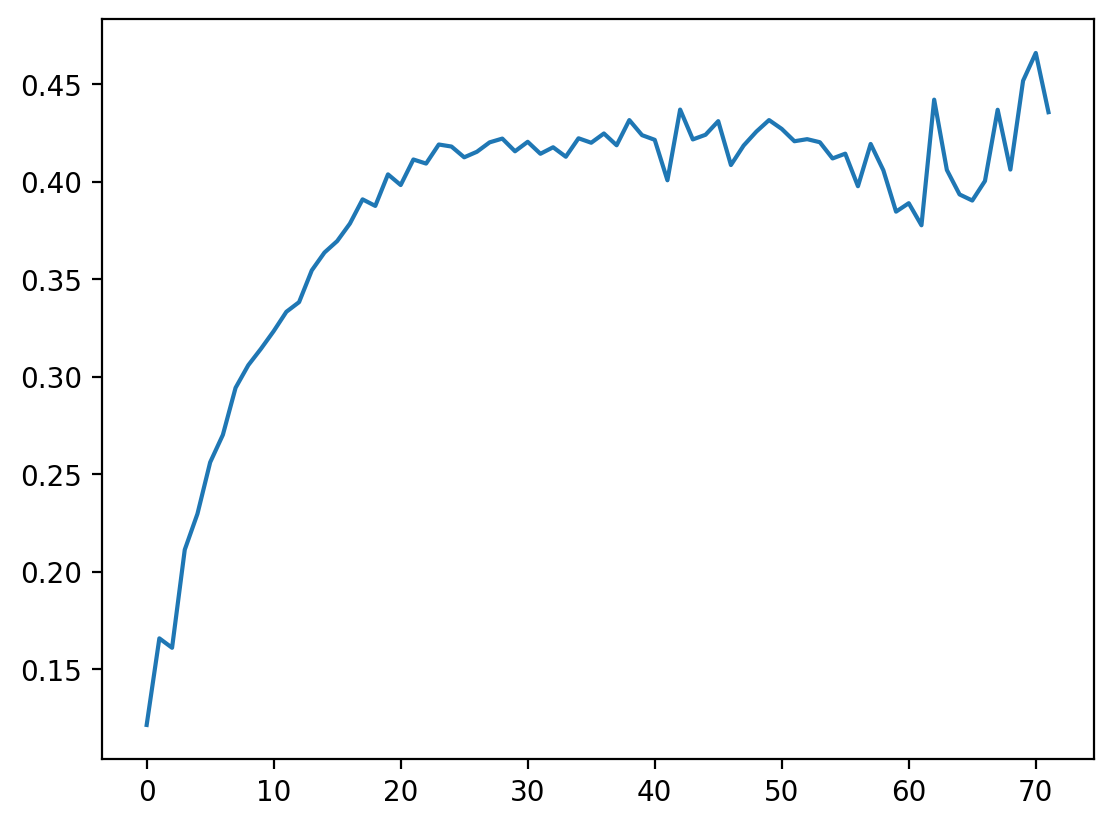

In [15]:
# trazar un espectro
plt.plot(spectrum)

Text(0.5, 1.0, 'Spectrum from Pixel 300,237')

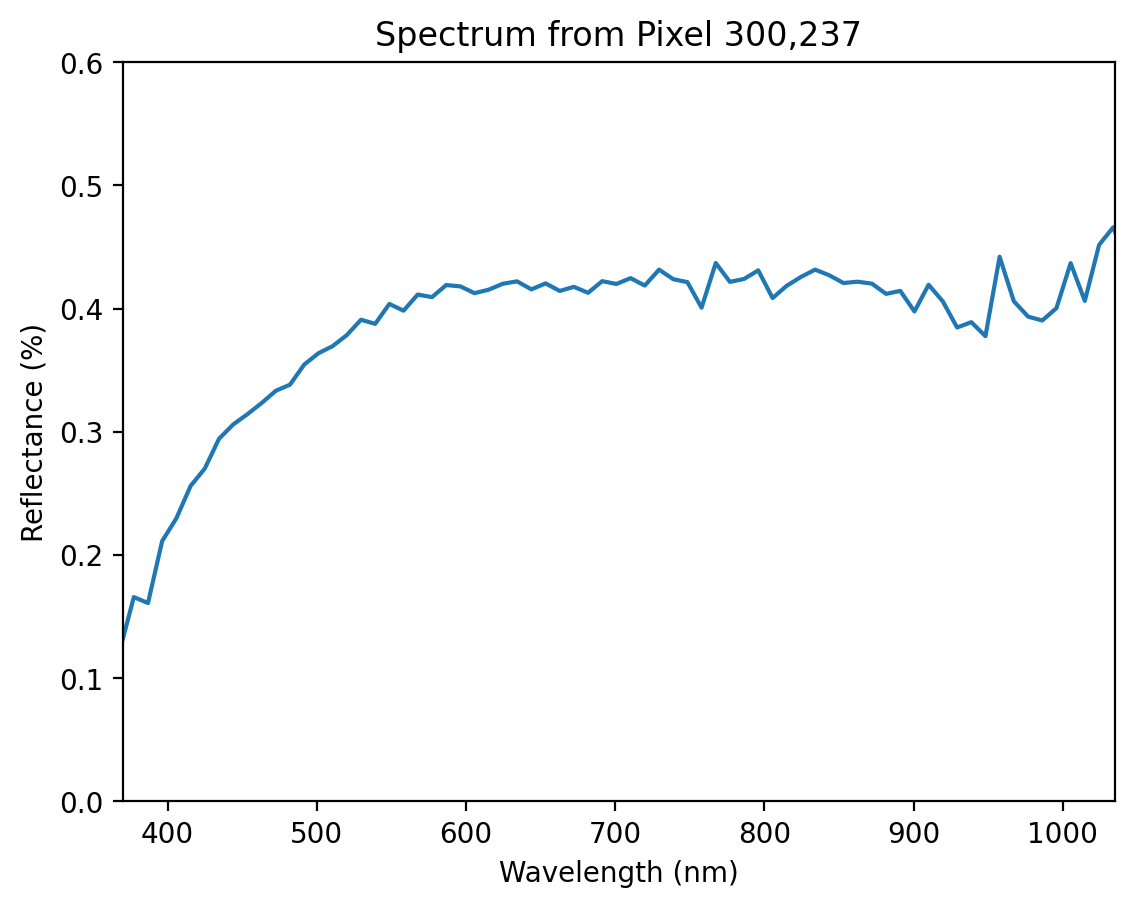

In [16]:
# Necesitamos etiquetar los ejes
wavelengths = dataset['info']['wavelength']

plt.plot(wavelengths,spectrum)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.ylim([0, 0.6])
plt.xlim([370, 1035])
plt.title(('Spectrum from Pixel ' + str(rr)+ ','+str(cc)))

# **<font color='#ECA702'>**<font color='#ECA702'>**<font color="#FF0000">R</font><font color="#FF7F00">e</font><font color="#FFFF00">t</font><font color="#00FF00">o</font><font color="#0000FF"> #</font><font color="#9400D3">2</font> 💪**</font>


*   Trazar una imagen de una banda individual
*   Ejercicio: Cambia el número de banda en la línea de abajo para ver diferentes bandas de la imagen HSI.
* Encontrar los números de banda para las longitudes de onda aproximadas del rojo, verde y azul (RGB).
* Hacer una imagen psuedo-RGB a partir de las bandas adecuadas
* **<font color="#FF0000">E</font><font color="#FF7F00">x</font><font color="#FFFF00">t</font><font color="#00FF00">r</font><font color="#0000FF">a</font>:** Realizar una transformación para mejorar la visualización de la imagen.



Text(0.5, 1.0, 'A single band of Hyperspectral Image in False Color')

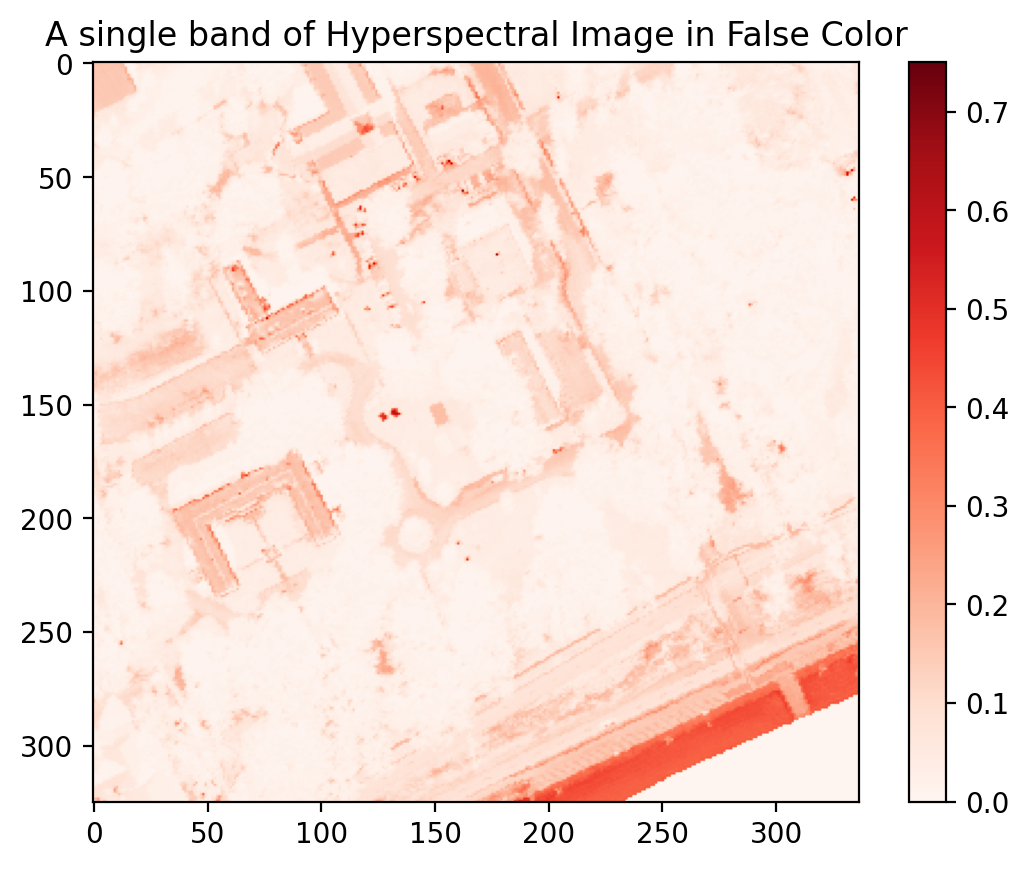

In [44]:
# trazar una imagen de una banda individual
# Ejercicio: Cambia el número de banda en la línea de abajo para ver diferentes bandas de la imagen HSI
plt.imshow(hsi[:,:,9],vmin=0,vmax=.75,cmap='Reds')
plt.colorbar()
plt.title('A single band of Hyperspectral Image in False Color')

In [25]:
wavelengths[9]

453.5

In [31]:
wavelengths[20]

558.099976

In [32]:
wavelengths[30]

653.299988

In [42]:
# encontrar los números de banda para las longitudes de onda aproximadas del rojo, verde y azul (RGB)
wavelengths[9],wavelengths[20],wavelengths[30] # Obtenemos las longitudes de onda de esas bandas

(453.5, 558.099976, 653.299988)

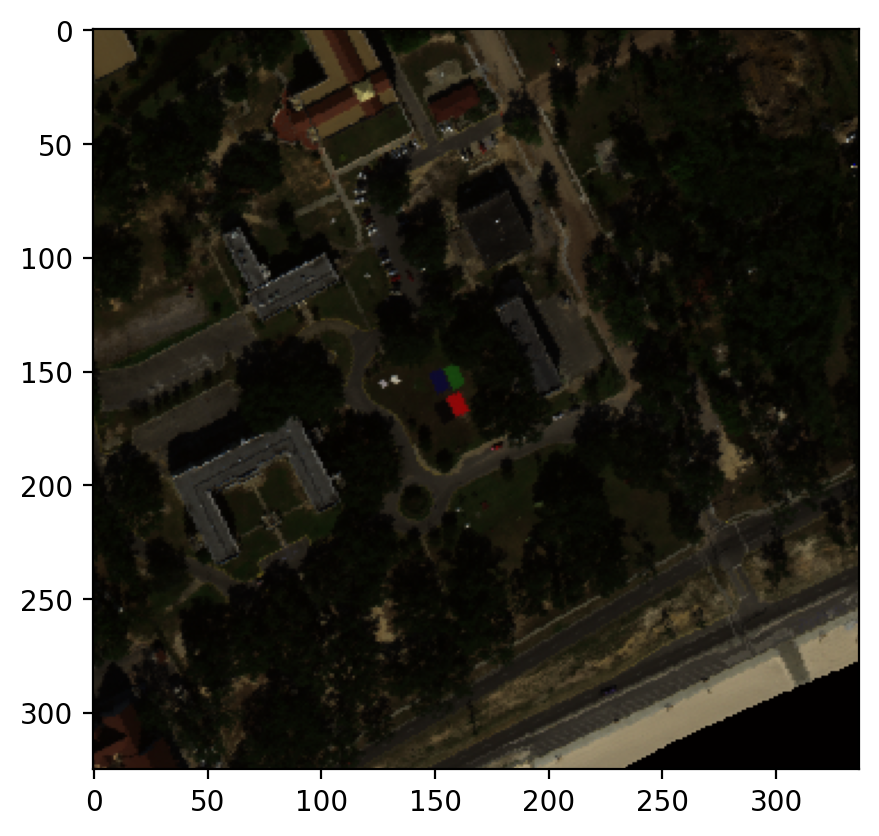

In [73]:
# Hacer una imagen psuedo-RGB a partir de las bandas adecuadas
import numpy as np
psuedo_rgb = hsi[:,:,(30,20,9)]
psuedo_rgb = np.clip(psuedo_rgb,0,1.0)
plt.imshow(psuedo_rgb)

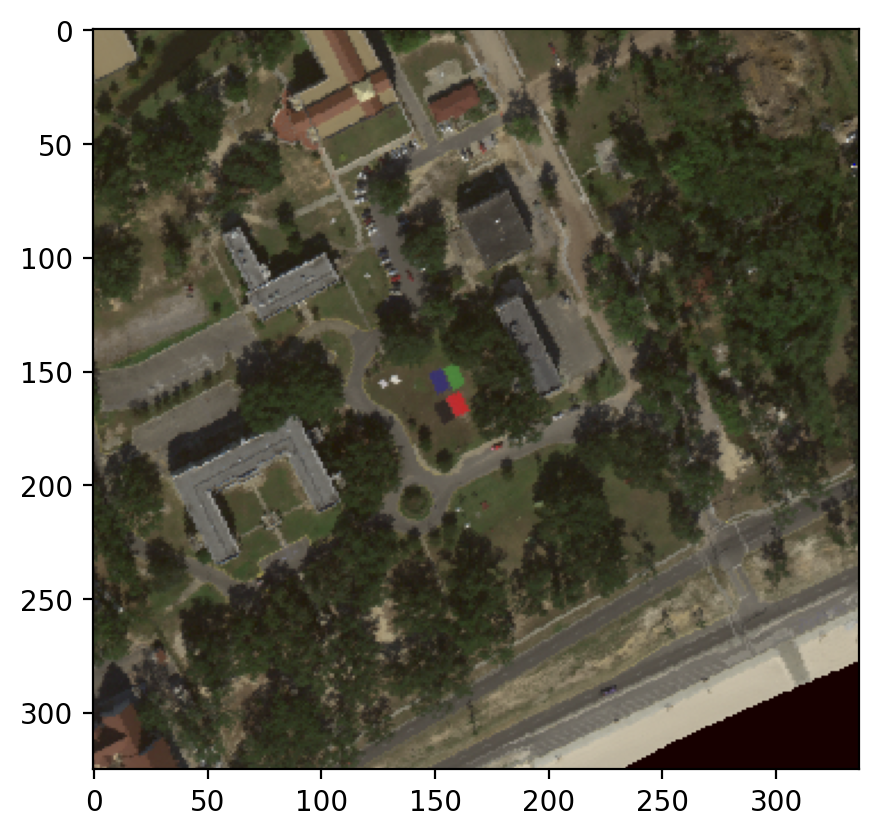

In [74]:
# Es demasiado oscuro. Añadimos un poco de corrección gamma
gamma = 0.5
psuedo_rgb_gamma = np.power(psuedo_rgb, gamma)
plt.imshow(psuedo_rgb_gamma)

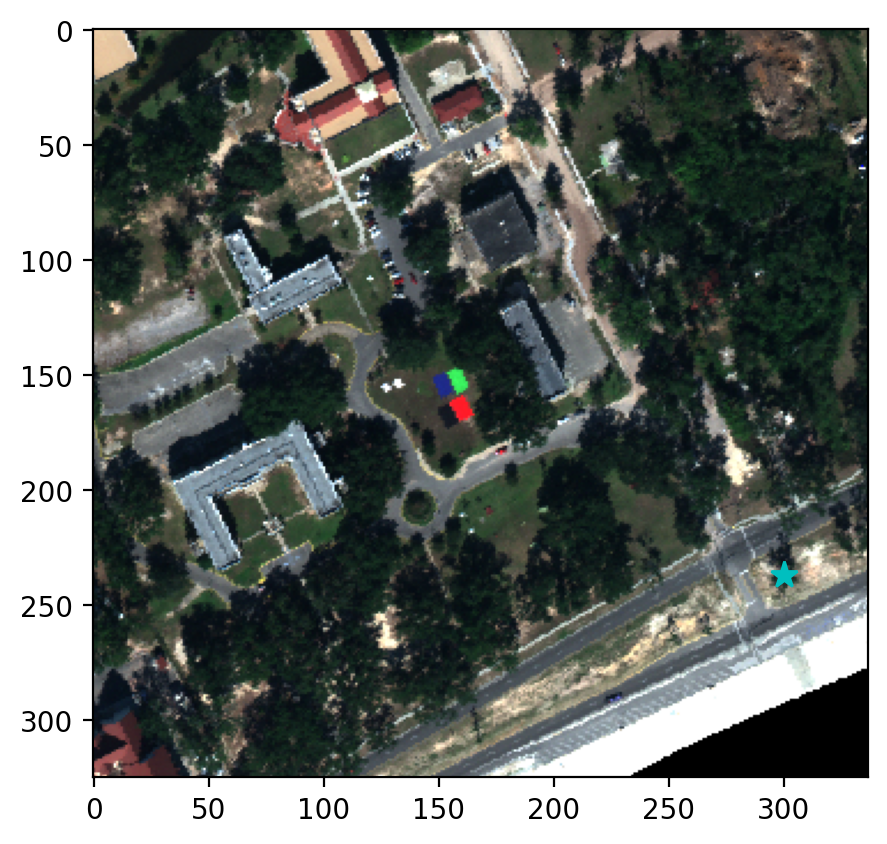

In [52]:
# comparar con la imagen RGB proporcionada (hecha con una mejor selección/ponderación de bandas)
plt.figure(figsize=(5,5))
plt.imshow(dataset['RGB'])
plt.plot(rr,cc,'c*',markersize=10) #etiquetar la ubicación del píxel seleccionado en el gráfico anterior

**¿Qué tipo de análisis puede realizarse con una imagen hiperespectral?**

Entre las técnicas habituales de análisis de imágenes hiperespectrales se incluyen:

 * **Desmezcla hiperespectral**:  El objetivo del desmezclado hiperespectral es descomponer un cubo de imagen en las firmas espectrales *puras* que se encuentran en una escena (llamadas **miembros finales**) y la cantidad (o **proporción**) de cada miembro final que se encuentra en cada píxel. Se trata de un análisis *subpíxel*, ya que estamos determinando cantidades subpíxel de cada material en cada píxel.

  * **Detección de objetivos subpíxel**: Detección de un objetivo (de tamaño subpíxel) en una escena hiperespectral.  

  * **Clasificación**: Clasificación de cada píxel (o parte de un píxel) en una de varias categorías o clases de interés.
